In [1]:
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="1234",
  database="outdoor_pollution"
)

mycursor = mydb.cursor()

In [3]:
query="SELECT country_name, year, death_under_5 FROM pollution_rates_age_under_5 INNER JOIN countries ON countries.country_id = pollution_rates_age_under_5.country_id"

mycursor.execute(query)

In [4]:
df = pd.DataFrame(mycursor.fetchall())

In [5]:
df.columns = ["country_name", "year", "death_under_5"]

In [6]:
cam = df.loc[df["country_name"] == "Cameroon"]
egy = df.loc[df["country_name"] == "Egypt"]
gbn = df.loc[df["country_name"] == "Gabon"]

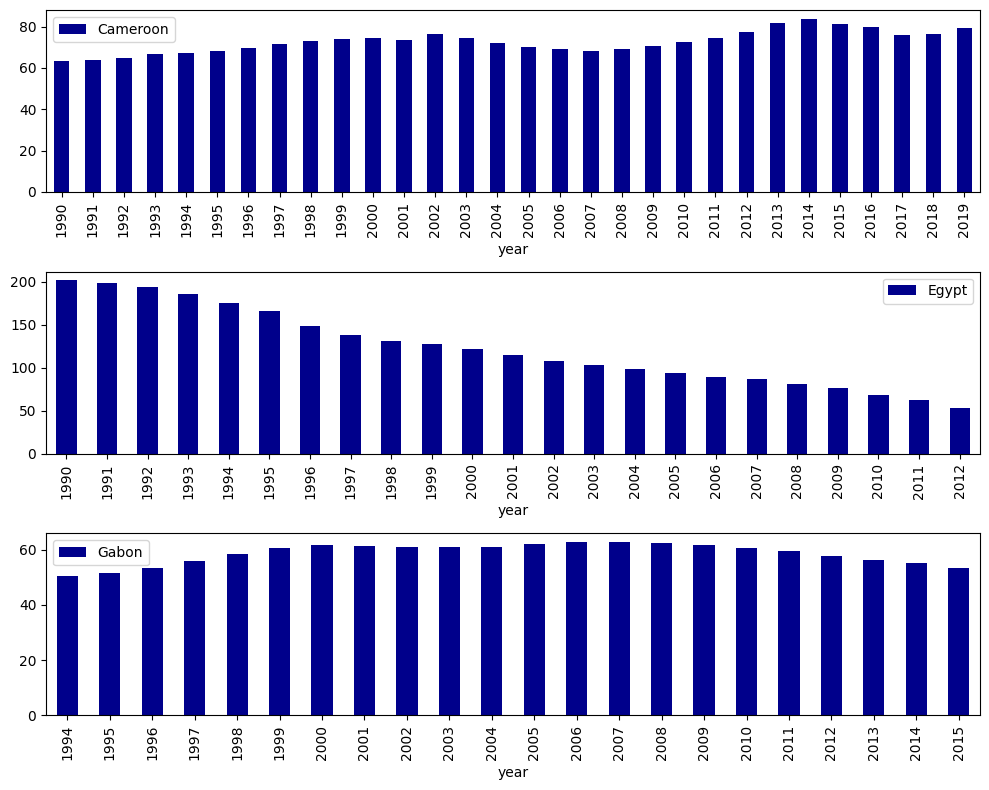

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,8))

cam.plot(kind='bar', x='year', y='death_under_5', color='DarkBlue', label='Cameroon', ax=ax1)
egy.plot(kind='bar', x='year', y='death_under_5', color='DarkBlue', label='Egypt', ax=ax2)
gbn.plot(kind='bar', x='year', y='death_under_5', color='DarkBlue', label='Gabon', ax=ax3)

plt.tight_layout()
plt.legend()
plt.show()
